# TSP heuristic: 2-opt

In [1039]:
import math
import random as rd
import numpy as np
import networkx
#import itertools #permutations
import matplotlib.pyplot as plt
import time

## Initialize the problem with random data

In [999]:
#create tourlist initialized for savings heuristic with n costumers
n=20
tourlist=[]
for i in range(1,n+1):
    tourlist.append([i])
print(tourlist)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20]]


In [1000]:
#random distance matrix; not symmetric

#get coordinates of n costumers; depot at origin by default

x_depot_costumers=np.zeros(n+1)
y_depot_costumers=np.zeros(n+1)

x_depot_costumers[0]=0
y_depot_costumers[0]=0

for i in range(1,n+1):
    x_depot_costumers[i]=rd.uniform(-10, 10)
    y_depot_costumers[i]=rd.uniform(-10, 10)
    
#compute the distance matrix (euclidean distance times random factor greater than 1)

distance_matrix=np.zeros((n+1,n+1))

for i in range(0,n+1):
    for j in range(0,n+1):
        if i==j:
            distance_matrix[i][j]=0
        else:
            alpha=rd.uniform(1, 1.15)
            #alpha=1 #makes it easier to see if solution is correct
            distance_matrix[i][j]=math.sqrt(((x_depot_costumers[i]-x_depot_costumers[j])**2)+((y_depot_costumers[i]-y_depot_costumers[j])**2))*alpha
            

In [1001]:
#choose random TSP solution

random_tour=np.random.permutation(n) #the element i in random_tour corresponds to costumer i+1
print(random_tour)

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]


## The length of a tour

In [1002]:
#compute the length of the initial tour

def length_of_tour(random_tour,distance_matrix):
    length=0

    length=length+distance_matrix[0][int(random_tour[0])+1]
    for i in range(0,n-1):
        length=length+distance_matrix[int(random_tour[i])+1][int(random_tour[i+1])+1]
    length=length+distance_matrix[int(random_tour[n-1])+1][0]
    return length


In [1003]:
tour_length=length_of_tour(random_tour,distance_matrix)
print(tour_length)

255.25811431303055


## 2-opt Algorithm

In [1004]:
#2-opt with first improvement strategy: remove two edges and put two other edges in -> inverse a segment of costumer ordering


#a 2-opt step:

new_tour=np.zeros(n)
for m in range(0,n):
    new_tour[m]=int(random_tour[m])

def first_improvement(new_tour,distance_matrix,tour_length):
    
    for i in range(2,n): #size of segment; 1 and n don't change the tour
        for j in range(0,n-i+1): #start of segment j end of segment i+j-1
            
            loop_tour=np.zeros(n)
            for m in range(0,n):
                loop_tour[m]=int(new_tour[m])
            
            inverse_segment=np.zeros(i)
            
            for m in range(0,i):
                inverse_segment[m]=loop_tour[j:i+j][::-1][m]
                
            s=0
            
            for k in range(j,i+j): #create the new tour
                while s<i:
                    loop_tour[j+s]=inverse_segment[s]
                    #print(inverse_segment[s])
                    s=s+1
                
            current_l=length_of_tour(loop_tour,distance_matrix)
            #print(l)
        
            if current_l<tour_length: #do change the tour if an improvement is found
                #new_tour_length=current_l
                new_tour=loop_tour
                #print(loop_tour)
                break
            
            #else:
                #new_tour=np.zeros(n)
                #for m in range(0,n):
                    #new_tour[m]=int(random_tour[m])
                    
        if current_l<tour_length: #do change the tour if an improvement is found
            break
                    
    return new_tour,current_l
      

In [1005]:
#multiple 2-opt steps:

def twoopt(random_tour,distance_matrix):
    
    #initialize tour_length and new_tour
    
    tour_length=length_of_tour(random_tour,distance_matrix)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple 2-opt steps
        
    new_length=tour_length
    
    while new_length<=tour_length:
        
        FI2OPT=first_improvement(new_tour,distance_matrix,tour_length)
    
        new_length=FI2OPT[1]
    
        if new_length<tour_length:
            new_tour=FI2OPT[0]
            tour_length=FI2OPT[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_length

In [1006]:
twoopt(random_tour,distance_matrix) #solution

(array([17.,  7.,  4., 19., 11., 12.,  1., 10.,  5.,  6.,  9., 16.,  0.,
        14.,  8.,  3.,  2., 15., 13., 18.]),
 90.63408831453421)

## Tour plots

In [1007]:
#plot current tour (random_tour)

x_depot_costumers_depot=np.append(x_depot_costumers,0)
y_depot_costumers_depot=np.append(y_depot_costumers,0)

x_tour=np.zeros(n+2)
y_tour=np.zeros(n+2)

for i in range(1,n+1):
    x_tour[i]=x_depot_costumers[random_tour[i-1]+1]
    y_tour[i]=y_depot_costumers[random_tour[i-1]+1]

#plt.plot(x_depot_costumers_depot,y_depot_costumers_depot) #tour 0 1 2 3 ... 9 10 0

In [1008]:
test_new_tour=twoopt(random_tour,distance_matrix)[0]
#print(test_new_tour)

In [1009]:
#plot optimized tour (test_new_tour)
x_opttour=np.zeros(n+2)
y_opttour=np.zeros(n+2)

for i in range(1,n+1):
    x_opttour[i]=x_depot_costumers[int(test_new_tour[i-1])+1]
    y_opttour[i]=y_depot_costumers[int(test_new_tour[i-1])+1]

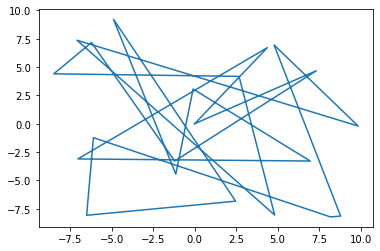

In [1010]:
plt.plot(x_tour,y_tour) #original tour

In [1011]:
c

NameError: name 'c' is not defined

# A special case of 3-opt: Replacing one costumer

In [1012]:
#fist improvement strategy

def tour_replace(random_tour,tour_length):
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    current_length=0
    l=tour_length
    a=0
    
    for i in range(0,n): #pick the position of the costumer to replace #PROBLEM: doesn't increase i!!!
        
        #print('i:',i)
        
        replace=int(new_tour[i]) #costumer-1
        #print(replace)
        
        for j in range(0,n): #pick new spot for the costumer
            
            #print('j:',j)
            
            if i==j:
                #print("gleich")
                continue #no change would happen
               
            
            new_tour=np.zeros(n)
            for m in range(0,n):
                new_tour[m]=int(random_tour[m])
               
            
            loop_tour=np.zeros(n)
            for m in range(0,n): #create the new tour
                loop_tour[m]=int(new_tour[m])
                
            #print(loop_tour)
            
            loop_tour[j]=replace
                
            for m in range(0,n):
                                 
                if j>i:
                        
                    if m>=i and m<j:
                        
                        loop_tour[m]=new_tour[m+1]
                        #print(new_tour[m+1])
                                        
                if j<i:
                        
                    if m>j and m<=i:
                        
                        loop_tour[m]=new_tour[m-1]
                        #print(new_tour[m-1])
                        
            #print(loop_tour)                
                        
            current_length=length_of_tour(loop_tour,distance_matrix) #length of the created tour
            #print(current_length)
                
            if current_length<l and current_length>0:
                new_tour=loop_tour
                l=current_length
                #print(l)
                #print(loop_tour)
                a=1
                break
                    
        if a==1:
            break
                
    return new_tour,l
                    

In [1013]:
tour_length=length_of_tour(random_tour,distance_matrix)
print(tour_length)
print(random_tour)

255.25811431303055
[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]


In [1014]:
tour_replace(random_tour,tour_length)

(array([ 9., 19., 13., 17.,  0., 12., 14., 16.,  6.,  2.,  3., 11., 15.,
        10.,  8.,  7.,  5.,  1., 18.,  4.]),
 250.87597221661318)

In [1015]:
#multiple steps:

def multreplace(random_tour,distance_matrix):
    
    #initialize tour_length and new_tour
    
    tour_length=length_of_tour(random_tour,distance_matrix)
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    #do multiple steps
        
    new_length=tour_length
    
    while new_length<=tour_length:
        
        #print("STEP")
        
        RP=tour_replace(new_tour,tour_length)
    
        new_length=RP[1]
    
        if new_length<tour_length:
            new_tour=RP[0]
            tour_length=RP[1]
            #print(tour_length)
        
        else:
            break
        
    return new_tour,tour_length

In [1016]:
multreplace(random_tour,distance_matrix)

(array([ 6.,  9., 16., 18.,  0., 14.,  8.,  2.,  3., 13., 15.,  4., 11.,
        19.,  7., 17., 12.,  1., 10.,  5.]),
 86.43328601581157)

## Tour plots

In [1017]:
test_new_tour2=multreplace(random_tour,distance_matrix)[0]
print(test_new_tour2)

[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]


In [1018]:
multreplace(test_new_tour2,distance_matrix)

(array([ 6.,  9., 16., 18.,  0., 14.,  8.,  2.,  3., 13., 15.,  4., 11.,
        19.,  7., 17., 12.,  1., 10.,  5.]),
 86.43328601581157)

In [1019]:
#plot optimized tour (test_new_tour2)
x_opttour2=np.zeros(n+2)
y_opttour2=np.zeros(n+2)

for i in range(1,n+1):
    x_opttour2[i]=x_depot_costumers[int(test_new_tour2[i-1])+1]
    y_opttour2[i]=y_depot_costumers[int(test_new_tour2[i-1])+1]

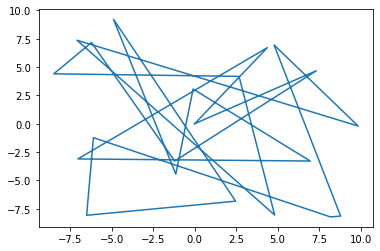

In [1020]:
plt.plot(x_tour,y_tour) #original tour

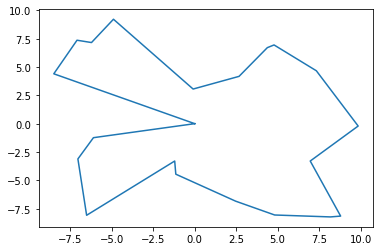

In [1021]:
plt.plot(x_opttour2,y_opttour2) #tour after costumer replacements

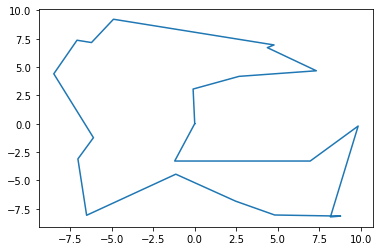

In [1022]:
plt.plot(x_opttour,y_opttour) #tour after 2-opt

#  A mixed heuristic

In [1122]:
#2-opt first replace second loop

def mixed1(random_tour,distance_matrix):
    
    print(random_tour)
    
    # initialize with 2-opt:   
    loop_tour=twoopt(random_tour,distance_matrix)[0]
    loop_length=twoopt(random_tour,distance_matrix)[1]
    
    print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,3): #maximal number of loops
       
            new_tour=multreplace(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=twoopt(new_tour,distance_matrix)[0]
            print(loop_tour)
            
            if twoopt(new_tour,distance_matrix)[1]-multreplace(loop_tour,distance_matrix)[1]==0:
                a=1
                
            if a==1:
                break
            
        a=1
        
    loop_length=twoopt(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length
            


In [1123]:
#replace first 2-opt second loop

def mixed2(random_tour,distance_matrix):
    
    #print(random_tour)
    
    # initialize with replacement heuristic:   
    loop_tour=multreplace(random_tour,distance_matrix)[0]
    loop_length=multreplace(random_tour,distance_matrix)[1]
    
    #print(loop_tour)
    
    a=0
    
    while a==0: #stop, when there is no improvement
        for i in range(0,3): #maximal number of loops
        
            new_tour=twoopt(loop_tour,distance_matrix)[0]
            print(new_tour)
        
            loop_tour=multreplace(new_tour,distance_matrix)[0]
            print(loop_tour)
        
            if multreplace(new_tour,distance_matrix)[1]-twoopt(loop_tour,distance_matrix)[1]==0:
                a=1
                
            #print(a)
                
            if a==1:
                break
        
    loop_length=multreplace(loop_tour,distance_matrix)[1]
        
    return loop_tour,loop_length
            



In [1124]:
mixed1(random_tour,distance_matrix)

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]
[17.  7.  4. 19. 11. 12.  1. 10.  5.  6.  9. 16.  0. 14.  8.  3.  2. 15.
 13. 18.]
[17.  7. 19. 11. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13.
 15.  4.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]


(array([17., 12.,  1., 10.,  5.,  6.,  9., 16., 18.,  0., 14.,  8.,  2.,
         3., 13., 15.,  4., 11., 19.,  7.]),
 81.14516793022223)

In [1125]:
mixed2(random_tour,distance_matrix)

[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]


(array([ 6.,  9., 16., 18.,  0., 14.,  8.,  2.,  3., 13., 15.,  4., 11.,
        19.,  7., 17., 12.,  1., 10.,  5.]),
 86.43328601581157)

## Plots

In [1027]:
mixed_tour2=mixed2(random_tour,distance_matrix)[0]

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]


In [1028]:
mixed_tour1=mixed1(random_tour,distance_matrix)[0]

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]
[17.  7.  4. 19. 11. 12.  1. 10.  5.  6.  9. 16.  0. 14.  8.  3.  2. 15.
 13. 18.]
[17.  7. 19. 11. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13.
 15.  4.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]


In [1029]:
#plot optimized tour (mixed_tour1)
x_opttour4=np.zeros(n+2)
y_opttour4=np.zeros(n+2)

for i in range(1,n+1):
    x_opttour4[i]=x_depot_costumers[int(mixed_tour1[i-1])+1]
    y_opttour4[i]=y_depot_costumers[int(mixed_tour1[i-1])+1]

In [1030]:
#plot optimized tour (mixed_tour2)
x_opttour3=np.zeros(n+2)
y_opttour3=np.zeros(n+2)

for i in range(1,n+1):
    x_opttour3[i]=x_depot_costumers[int(mixed_tour2[i-1])+1]
    y_opttour3[i]=y_depot_costumers[int(mixed_tour2[i-1])+1]

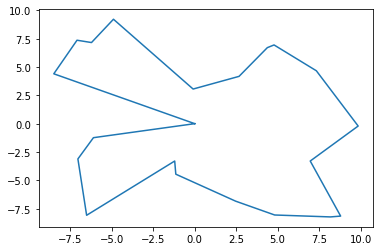

In [1031]:
plt.plot(x_opttour2,y_opttour2) #tour after costumer replacements

In [1038]:
multreplace(random_tour,distance_matrix)[1]

86.43328601581157

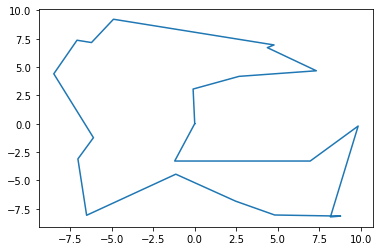

In [1032]:
plt.plot(x_opttour,y_opttour) #2-opt solution

In [1037]:
twoopt(random_tour,distance_matrix)[1]

90.63408831453421

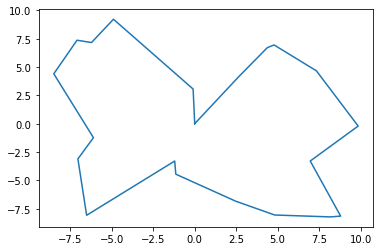

In [1033]:
plt.plot(x_opttour4,y_opttour4) #tour after mixed1

In [1035]:
mixed1(random_tour,distance_matrix)[1]

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]
[17.  7.  4. 19. 11. 12.  1. 10.  5.  6.  9. 16.  0. 14.  8.  3.  2. 15.
 13. 18.]
[17.  7. 19. 11. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13.
 15.  4.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]
[17. 12.  1. 10.  5.  6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11.
 19.  7.]


81.14516793022223

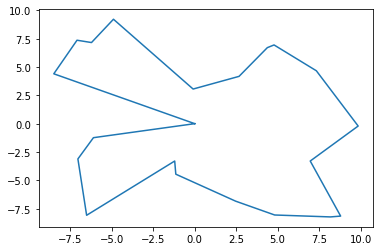

In [1034]:
plt.plot(x_opttour3,y_opttour3) #tour after mixed2

In [1036]:
mixed2(random_tour,distance_matrix)[1]

[19  9 13 17  0 12 14 16  6  2  3 11 15 10  8  7  5  1 18  4]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]
[ 6.  9. 16. 18.  0. 14.  8.  2.  3. 13. 15.  4. 11. 19.  7. 17. 12.  1.
 10.  5.]


86.43328601581157

# Runtimes

In [ ]:
#runtime of one first improvement stmaep should be half as long as a complete search step on average

In [1046]:
#complete strategy:

def tour_replace_fullsearch(random_tour,tour_length):
    
    new_tour=np.zeros(n)
    for m in range(0,n):
        new_tour[m]=int(random_tour[m])
        
    current_length=0
    l=tour_length
    a=0
    
    for i in range(0,n): #pick the position of the costumer to replace #PROBLEM: doesn't increase i!!!
        
        #print('i:',i)
        
        replace=int(new_tour[i]) #costumer-1
        #print(replace)
        
        for j in range(0,n): #pick new spot for the costumer
            
            #print('j:',j)
            
            if i==j:
                #print("gleich")
                continue #no change would happen
               
            
            new_tour=np.zeros(n)
            for m in range(0,n):
                new_tour[m]=int(random_tour[m])
               
            
            loop_tour=np.zeros(n)
            for m in range(0,n): #create the new tour
                loop_tour[m]=int(new_tour[m])
                
            #print(loop_tour)
            
            loop_tour[j]=replace
                
            for m in range(0,n):
                                 
                if j>i:
                        
                    if m>=i and m<j:
                        
                        loop_tour[m]=new_tour[m+1]
                        #print(new_tour[m+1])
                                        
                if j<i:
                        
                    if m>j and m<=i:
                        
                        loop_tour[m]=new_tour[m-1]
                        #print(new_tour[m-1])
                        
            #print(loop_tour)                
                        
            current_length=length_of_tour(loop_tour,distance_matrix) #length of the created tour
            #print(current_length)
                
            if current_length<l and current_length>0:
                new_tour=loop_tour
                l=current_length
                #print(l)
                #print(loop_tour)
                a=1
                #break
                    
        #if a==1:
            #break
                
    return new_tour,l
                    

In [1050]:
def twoopt_fullsearch(new_tour,distance_matrix,tour_length):
    
    for i in range(2,n): #size of segment; 1 and n don't change the tour
        for j in range(0,n-i+1): #start of segment j end of segment i+j-1
            
            loop_tour=np.zeros(n)
            for m in range(0,n):
                loop_tour[m]=int(new_tour[m])
            
            inverse_segment=np.zeros(i)
            
            for m in range(0,i):
                inverse_segment[m]=loop_tour[j:i+j][::-1][m]
                
            s=0
            
            for k in range(j,i+j): #create the new tour
                while s<i:
                    loop_tour[j+s]=inverse_segment[s]
                    #print(inverse_segment[s])
                    s=s+1
                
            current_l=length_of_tour(loop_tour,distance_matrix)
            #print(l)
        
            if current_l<tour_length: #do change the tour if an improvement is found
                #new_tour_length=current_l
                new_tour=loop_tour
                #print(loop_tour)
                #break
            
            #else:
                #new_tour=np.zeros(n)
                #for m in range(0,n):
                    #new_tour[m]=int(random_tour[m])
                    
        #if current_l<tour_length: #do change the tour if an improvement is found
            #break
                    
    return new_tour,current_l
      

In [1066]:
#size of neighborhood: n*(n-1)

start = time.time()

for i in range(0,100):
    #print(i)
    tour_replace_fullsearch(random_tour,tour_length)
    
end = time.time()

In [1067]:
print('{:5.3f}s'.format(end-start))

1.365s


In [1060]:
#size of neighborhood: 0.5*n*(n-3) #both neighborhoods have a size quadratic in n

start = time.time()

for i in range(0,100):
    #print(i)
    twoopt_fullsearch(new_tour,distance_matrix,tour_length)
    
end = time.time()

In [1061]:
print('{:5.3f}s'.format(end-start))

0.683s


In [1072]:
x = np.linspace(-0,50,10000)
y = (x**2)-x
z = ((x**2)-3*x)*0.5

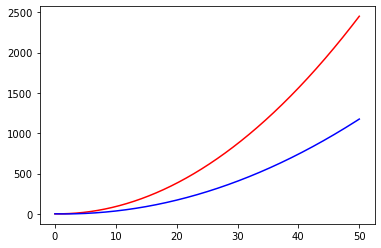

In [1076]:
plt.plot(x,y,color='red') #replace costumer
plt.plot(x,z,color='blue') #2-opt
plt.show()